In [1]:
import sys
import os

# Only add the project root to sys.path
root_path = os.path.abspath('..')
if root_path not in sys.path:
    sys.path.insert(0, root_path)

Detected Change Points by Binseg: [ 685 1300 2410 2625]
True Change Points: [712, 1293, 1930, 2586]
F1 Score: 0.6
Covering Score: 0.7454743768374934


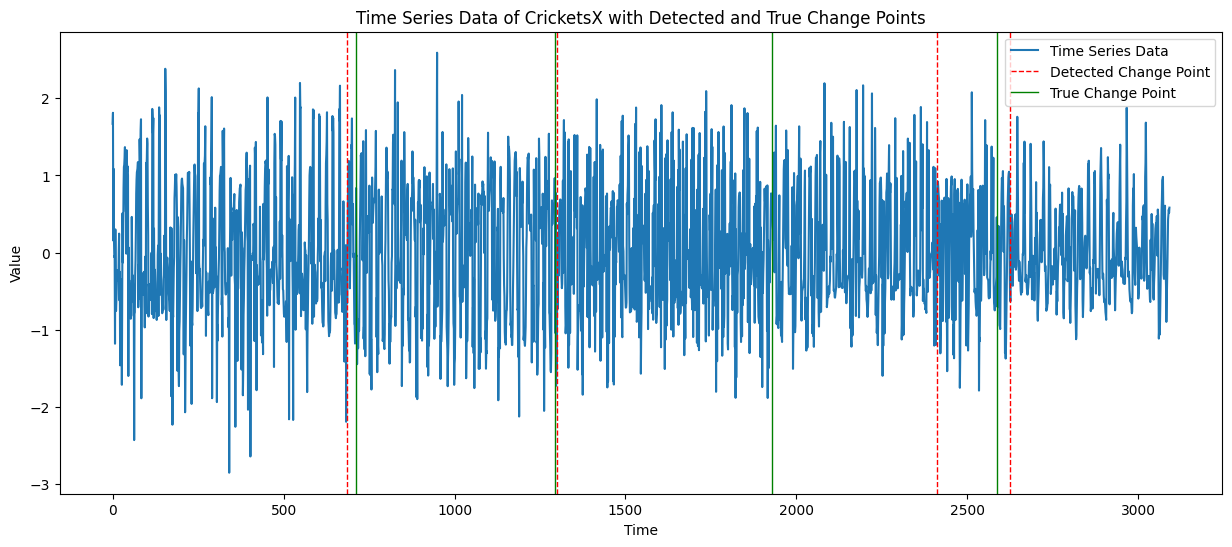

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from Functions.evaluate_binseg import evaluate_binseg
from Functions.metrics import f_measure, covering
from Functions.true_cps import read_true_change_points
from Algorithms.binseg import binseg
# from coverage import calculate_coverage_score

# Define the dataset name
dataset_name = 'CricketsX'

# Path to the dataset and description files
data_path = f'..\Data\{dataset_name}.txt'
desc_path = '..\Data\TrueCPS\desc.txt'

# Load the dataset
data = np.loadtxt(data_path)

# Read true change points
true_change_points = read_true_change_points(desc_path, dataset_name)

# Parameters for binseg function
n_cps = 4
cost_func = "rbf"

# Call the binseg function on the loaded data
change_points = binseg(data, n_cps, cost_func)

# Print the detected change points
dataset, true_cps, detected_cps, f1_score, covering_score = evaluate_binseg(dataset_name, data, true_change_points, cost_func=cost_func)

print(f"Detected Change Points by Binseg: {detected_cps}")
print(f"True Change Points: {true_cps}")
margin = int(len(data) * 0.01)  # 1% margin of the length of the data
f1_score = f_measure({0: true_change_points}, change_points, margin=margin)
covering_score = covering({0: true_change_points}, change_points, len(data))

# Print the scores
print(f"F1 Score: {f1_score}")
print(f"Covering Score: {covering_score}")

# Visualization
plt.figure(figsize=(15, 6))  # Adjust the figure size to make it wider
plt.plot(data, label='Time Series Data')

# Draw vertical lines for each change point detected by binseg
for cp in change_points:
    plt.axvline(x=cp, color='red', linestyle='--', linewidth=1, label='Detected Change Point' if cp == change_points[0] else "")

# Draw vertical lines for each true change point
for cp in true_change_points:
    plt.axvline(x=cp, color='green', linestyle='-', linewidth=1, label='True Change Point' if cp == true_change_points[0] else "")

plt.xlabel('Time')
plt.ylabel('Value')
plt.title(f'Time Series Data of {dataset_name} with Detected and True Change Points')
plt.legend()
plt.show()

Dataset: CricketX
Detected Change Points by Binseg: [ 685 1300 2410 2625]
True Change Points: [712, 1293, 1930, 2586]
Time taken: 4.77 seconds



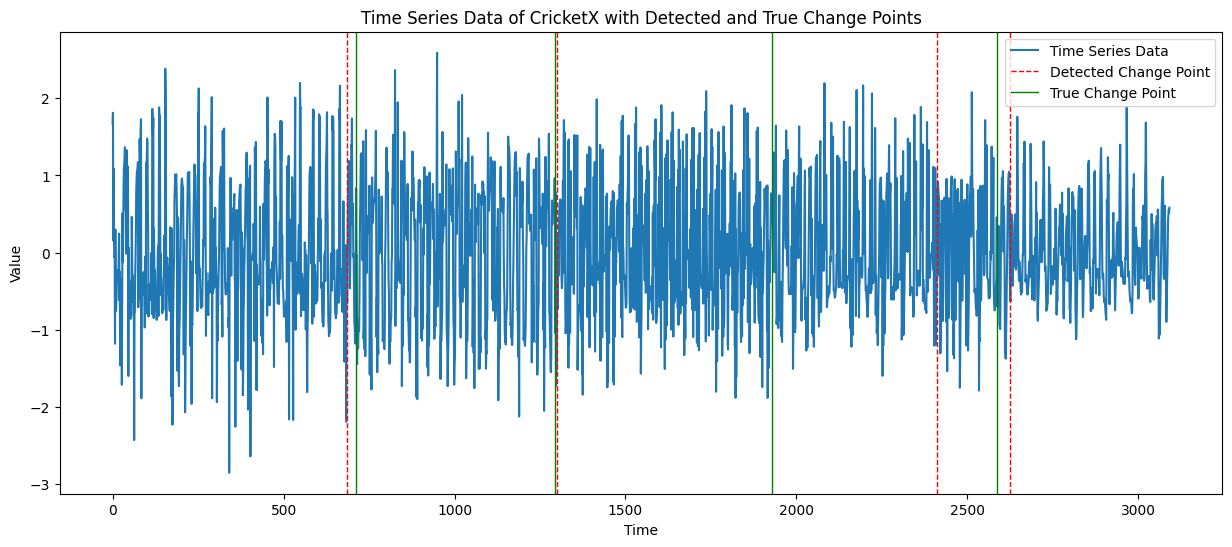

Dataset: CricketY
Detected Change Points by Binseg: [1290 1565 1820 2385]
True Change Points: [525, 1162, 1837, 2399]
Time taken: 3.11 seconds



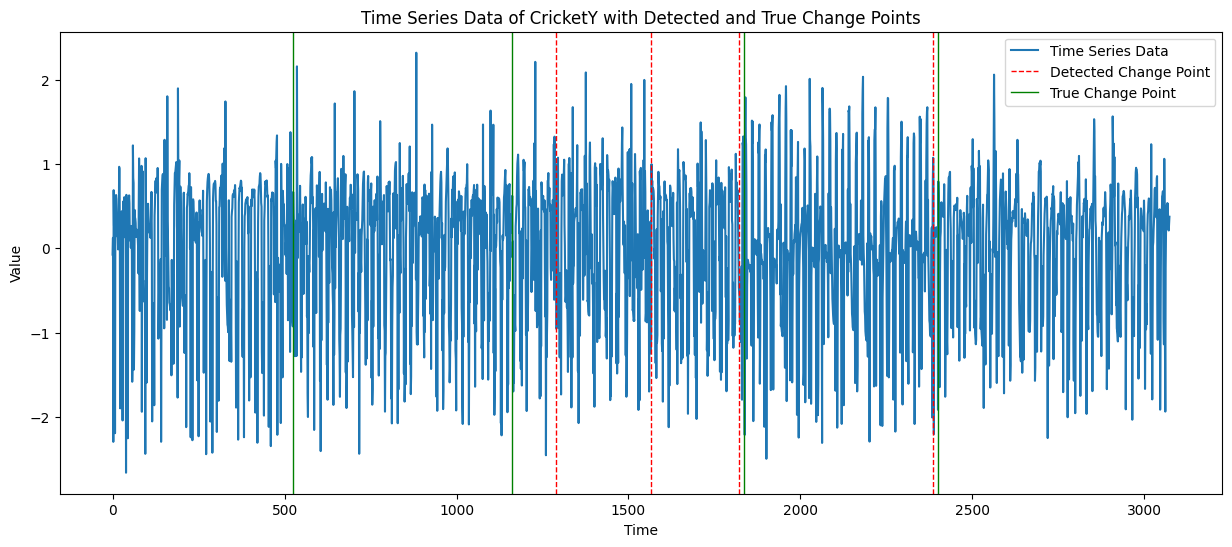

Dataset: CricketZ
Detected Change Points by Binseg: [ 620  955 1090 2185]
True Change Points: [600, 1106, 1574, 2174]
Time taken: 2.84 seconds



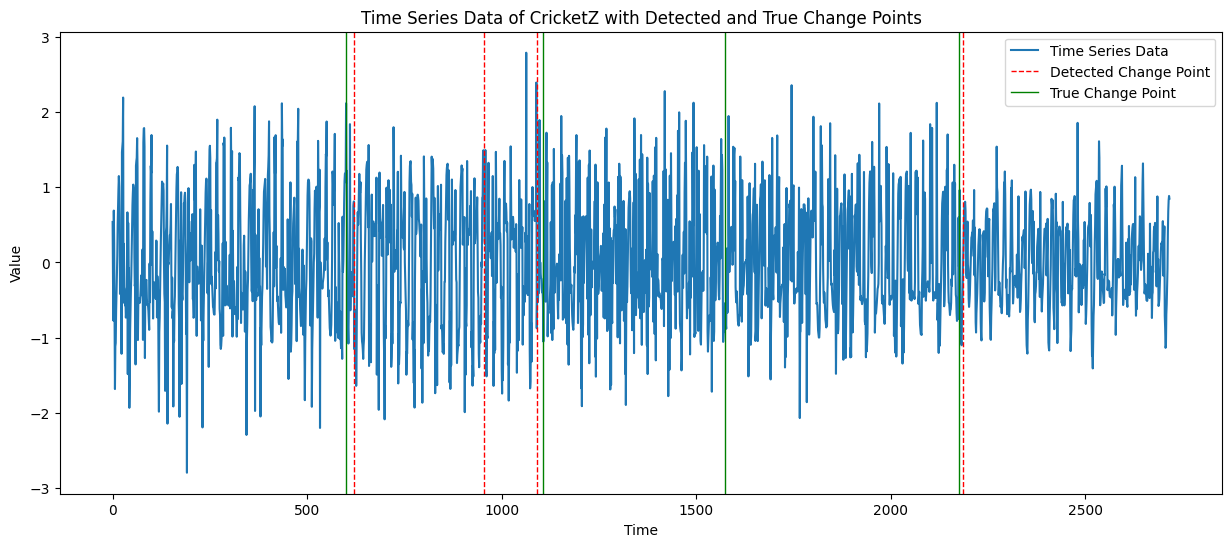

KeyboardInterrupt: 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time
from Functions.evaluate_binseg import evaluate_binseg
from Functions.metrics import f_measure, covering
from Functions.true_cps import read_true_change_points
from Functions.read_cps import read_number_of_change_points
from Algorithms.binseg import binseg

# List of dataset names
dataset_names = ['CricketX', 'CricketY', 'CricketZ', 
                 'InlineSkate', 'UWaveGestureLibraryAll', 
                 'UWaveGestureLibraryX', 'UWaveGestureLibraryY', 'UWaveGestureLibraryZ'
                 ]

# Path to the description files
desc_path = '../Data/TrueCPS/desc.txt'

# Parameters for binseg function
num_of_cps = read_number_of_change_points(desc_path)
cost_func = "rbf"

# Iterate through each dataset
for dataset_name in dataset_names:
    start_time = time.time()  # Start time tracking
    
    n_cps = num_of_cps.get(dataset_name, 1)
    # Path to the current dataset
    data_path = f'../Data/{dataset_name}.txt'

    # Load the dataset
    data = np.loadtxt(data_path)

    # Read true change points
    true_change_points = read_true_change_points(desc_path, dataset_name)

    # # Call the binseg function on the loaded data
    # change_points = binseg(data, n_cps, cost_func)

    # Evaluate the detected change points
    dataset, true_cps, detected_cps, f1_score, covering_score = evaluate_binseg(dataset_name, data, true_change_points, cost_func=cost_func)

    end_time = time.time()  # End time tracking
    elapsed_time = end_time - start_time  # Calculate elapsed time
    
    # Print the results
    print(f"Dataset: {dataset_name}")
    print(f"Detected Change Points by Binseg: {detected_cps}")
    print(f"True Change Points: {true_cps}")
    print(f"Time taken: {elapsed_time:.2f} seconds\n")
    # Visualization
    plt.figure(figsize=(15, 6))  # Adjust the figure size to make it wider
    plt.plot(data, label='Time Series Data')

    # Draw vertical lines for each change point detected by binseg
    for cp in detected_cps:
        plt.axvline(x=cp, color='red', linestyle='--', linewidth=1, label='Detected Change Point' if cp == detected_cps[0] else "")

    # Draw vertical lines for each true change point
    for cp in true_cps:
        plt.axvline(x=cp, color='green', linestyle='-', linewidth=1, label='True Change Point' if cp == true_cps[0] else "")

    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'Time Series Data of {dataset_name} with Detected and True Change Points')
    plt.legend()
    plt.show()
